# Laboratorio 4 BI

### Integrantes:
### Luisa Fernanda Fuentes Ladino - 202014321
### Andrés Felipe Lugo Saavedra - 202012538

In [113]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

# Carga de datos

In [114]:
# Se cargan los datos. 
df_original = pd.read_csv('202220_Laboratorio_3_data_university_admission_train.csv')
df_train = df_original.copy()
print(df_train.shape)
df_train.head(5)

(1569, 10)


,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,4,432,320,94,2,1.38,3.50,8.78,1,73.00


In [115]:
df_test = pd.read_csv('202220_Laboratorio_3_data_university_admission_test.csv')
print(df_test.shape)
df_test.head(5)

(175, 8)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,117,299,102,3,4.0,3.5,8.62,0
1,49,321,110,3,3.5,5.0,8.85,1
2,94,301,97,2,3.0,3.0,7.88,1
3,108,338,117,4,3.5,4.5,9.46,1
4,327,299,100,3,2.0,2.0,8.02,0


## Limpieza de datos, se eliminarán los valores nulos, los duplicados y las columnas que no aportan información valiosa a la regresión (Serial No y Unnamed)

In [116]:
df_train_l=df_train.copy()

df_train_l = df_train_l.dropna()
df_train_l = df_train_l.drop_duplicates()

df_train_l = df_train_l.drop(['Unnamed: 0'], axis=1)

df_train_l.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Points
0,479,327,113,4,4.00,2.77,8.88,1,84.47
1,446,301,92,1,1.85,1.50,7.71,0,45.08
2,336,297,100,1,2.41,1.59,7.89,0,47.42
3,20,303,98,3,3.50,3.00,8.50,0,62.00
4,432,320,94,2,1.38,3.50,8.78,1,73.00


# Implementación de la Regresión Lineal

In [117]:
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
selected_cols = ['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','CGPA','Research']

pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),]

In [118]:
# Creación del modelo
model = [('model', LinearRegression())]

In [119]:
# Declara el pipeline
pipeline = Pipeline(pre+model)

In [120]:
# Extraemos las variables explicativas y objetivo para entrenar
X = df_train_l.drop('Admission Points', axis = 1)
y = df_train_l['Admission Points']

pipeline = pipeline.fit(X,y)

# Exportar e Importar el Modelo

In [121]:
# Usamos la lbreria joblib
filename = 'modelo.joblib'
# Se guarda
dump(pipeline, filename) 
# Se lee
p2 = load(filename)
p2

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['Serial No.', 'GRE Score',
                                                   'TOEFL Score',
                                                   'University Rating', 'SOP',
                                                   'CGPA', 'Research'])])),
                ('model', LinearRegression())])

In [122]:
df_test_c=df_test.copy()
df_test_c.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,117,299,102,3,4.0,3.5,8.62,0
1,49,321,110,3,3.5,5.0,8.85,1
2,94,301,97,2,3.0,3.0,7.88,1
3,108,338,117,4,3.5,4.5,9.46,1
4,327,299,100,3,2.0,2.0,8.02,0


In [123]:
# Clasificamos los datos de test
df_test_c['Admission Points'] = p2.predict(df_test_c)

<AxesSubplot:xlabel='Admission Points', ylabel='Count'>

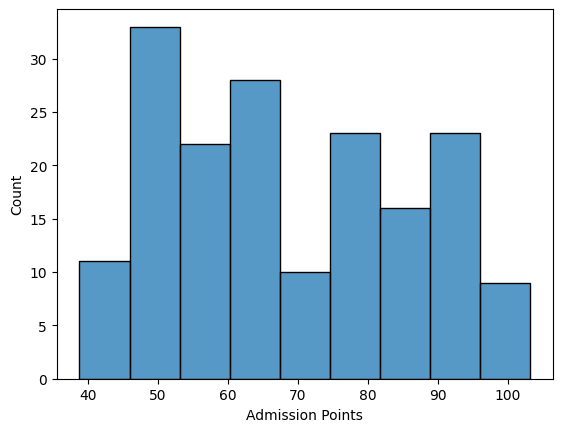

In [124]:
sns.histplot(df_test_c['Admission Points'])